In [1]:
import numpy as np
import matplotlib.pyplot as plt

Training Data

In [33]:
X = np.array([[6,3],
              [2,7],
              [9,6],
              [4,2]],dtype=float).T
y = np.array([1,0,1,0], dtype=float)

class_0 = X[:, np.where(y == 0)[0]]
class_1 = X[:, np.where(y == 1)[0]]

Text(0, 0.5, 'X2')

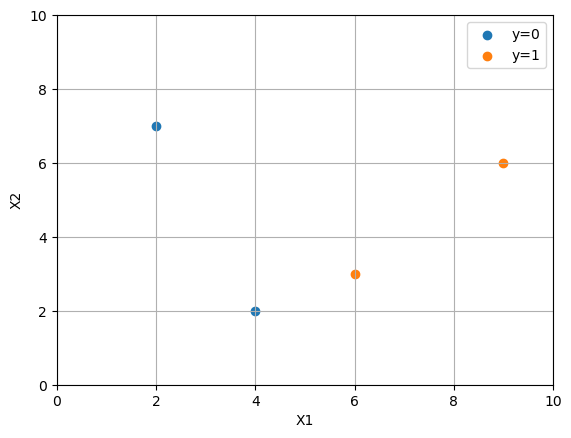

In [32]:
plt.figure()
plt.scatter(class_0[0,:], class_0[1,:])
plt.scatter(class_1[0,:], class_1[1,:])
plt.legend(['y=0', 'y=1'])
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('X1')
plt.ylabel('X2')


Learning

In [47]:
def Activation(X):
    return 1/(1 + np.exp(-X))

def DiffActivation(X):
    return Activation(X) * (1 - Activation(X))

def ForwardPass(W, b, X):
    # Layer 1
    v1 = W@X + b
    y1 = Activation(v1)
    
    return y1, v1

def LossFunction(y, d):
    return - d/y + (1-d)/(1-y)

In [62]:
print(Activation(0)*(1-Activation(0)))

0.25


In [48]:
w = np.array([0.5, 0.5], dtype=float)
b = 0.0
alpha = 0.1

In [51]:
dw = 0.0
db = 0.0

N = len(y)

for _ in range(1000):
    # forward pass
    y_hat, v = ForwardPass(w, b, X)

    # loss calculation
    e = LossFunction(y_hat, y)

    # backpropagation
    delta = DiffActivation(v) * e
    dw = np.dot(delta, y_hat.T) / N
    db = np.mean(delta)

    w -= alpha*dw
    b -= alpha*db

print(w)
print(b)

[0.52889726 0.52889726]
-4.771105679147798


Text(0, 0.5, 'X2')

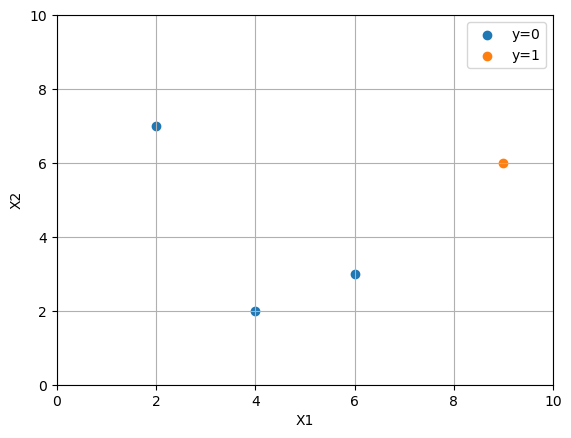

In [52]:
test_class_0 = X[:, np.where(y_hat < 0.5)[0]]
test_class_1 = X[:, np.where(y_hat >= 0.5)[0]]

plt.figure()
plt.scatter(test_class_0[0,:], test_class_0[1,:])
plt.scatter(test_class_1[0,:], test_class_1[1,:])
plt.legend(['y=0', 'y=1'])
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('X1')
plt.ylabel('X2')

